### Breast Cancer Classification with NN - Siddhardhan 

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

seed = 2

#### Data Collection & Processing

In [2]:
# Data Collection
breast_cancer_dataset = load_breast_cancer()
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
df['targets'] = breast_cancer_dataset.target
print(f'Shape: {df.shape}'); df.head()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### EDA

In [3]:
# Null Values
print(f'{'='*10} Null Values: {'='*10} \n\n{df.isnull().sum()}')

========== Null Values: ========== 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
targets                    0
dtype: int64


In [4]:
# Statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
# Target Count
print(f'Target Count:\n{df.targets.value_counts()}')

Target Count:
targets
1    357
0    212
Name: count, dtype: int64


In [6]:
# Statistics by Target
df.groupby('targets').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
targets,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


##### Splitting Dataset

In [7]:
# Separating features from Targets
X = df.drop(columns='targets')
y = df.targets
display(X.head())
display(y.head())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0
1    0
2    0
3    0
4    0
Name: targets, dtype: int64

In [8]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(f'Shape:\n- X_train: {X_train.shape}\n- y_train: {y_train.shape}\n- X_test:  {X_test.shape}\n- y_test:  {y_test.shape}')

Shape:
- X_train: (455, 30)
- y_train: (455,)
- X_test:  (114, 30)
- y_test:  (114,)


#### Neural Network

In [9]:
# Importing Pytorch
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

torch.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [10]:
# Model Structure & Training Loop Function
class Simple_Neural_Network(torch.nn.Module):
    def __init__(self, input_shape, n_neurons, output_shape):
        super().__init__()
        self.flatten_1 = torch.nn.Flatten()
        self.layer_1 = torch.nn.Linear(input_shape, n_neurons)
        self.relu_1 = torch.nn.ReLU()
        self.layer_2 = torch.nn.Linear(n_neurons, output_shape)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.flatten_1(x)
        x  = self.relu_1(self.layer_1(x))
        x  = self.sigmoid(self.layer_2(x))
        return x

# Training Loop
def train_model(my_model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=10):
    
    # Early Stopping Parameters - Initialization
    best_loss = float('inf')
    trigger_times = 0
    
    # List for Plotting Losses per Epoch
    train_epoch_losses = []
    val_epoch_losses = []

    for epoch in range (epochs):
        
        my_model.train() # Put model in training mode
        epoch_loss = 0      # Total Epoch Loss
        running_loss = 0.0  # Total Running Loss until a given Epoch
        correct = 0
        
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()               # Insert Explanation
            outputs = my_model(x_batch)         # Feed Forward
            loss = criterion(outputs, y_batch)  # Error Calculation
            loss.backward()                     # Backpropagation
            optimizer.step()                    # Update weights
            
            running_loss = running_loss + loss.item()           # Calculate Running Loss until this Epoch
            preds = outputs.argmax(dim=1)                       # Make the predictions for this Batch
            correct = correct + (preds == y_batch).sum().item() # Caclulate Total Correct Predictions in this Epoch
        
        epoch_loss = running_loss / len(train_loader.dataset); train_epoch_losses.append(epoch_loss)
        accuracy = correct / len(train_loader.dataset)
        
        # Validation
        my_model.eval()
        val_epoch_loss = 0 
        val_running_loss = 0
        val_correct = 0
        
        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val, y_val = x_val.to(device), y_val.to(device)
                val_outputs = my_model(x_val)               # Validation Feed Forward
                val_loss = criterion(val_outputs, y_val)    # Validation Error Calculation

                val_running_loss = val_running_loss + val_loss.item()   # Validation Running Loss until this Epoch
                val_preds = val_outputs.argmax(dim=1)                  # Make Validaiton Predictions for this Batch
                val_correct = val_correct + (val_preds == y_val).sum().item()

        val_epoch_loss = val_running_loss / len(val_loader.dataset); val_epoch_losses.append(val_epoch_loss)
        val_accuracy = val_correct / len(val_loader.dataset)
        
        # User Info				
        if (epoch + 1) % max(1, epochs // 10) == 0:
                print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Acc: {accuracy:.4f}, Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_accuracy:.4f}")
        
        # Early Stopping & Saving Best Model
        if (epoch_loss <= best_loss):
                best_loss = epoch_loss
                trigger_times = 0
                torch.save(my_model.state_dict(), f'best_model_breast_cancer.pth')
        else:
            trigger_times += 1
            if (trigger_times >= patience):
                print(f'Early stopping at epoch {epoch+1}')
                break
    my_model.load_state_dict(torch.load(f'best_model_breast_cancer.pth'))

    # Plotting
    plt.figure()
    plt.plot(train_epoch_losses, label='Train Loss')
    plt.plot(val_epoch_losses, label='Val Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

def test_model(my_model, test_loader, criterion):
    my_model.eval()
      
    test_running_loss = 0
    test_correct = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:           
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = my_model(x_batch)
            loss = criterion(outputs, y_batch)
            test_running_loss = test_running_loss + loss.item()
            test_preds = outputs.argmax(dim=1)
            test_correct = test_correct + (test_preds == y_batch).sum().item()
    
        avg_test_loss = test_running_loss / len(test_loader.dataset)
        test_accuracy = test_correct / len(test_loader.dataset)

        all_preds.extend(test_preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

        cm = confusion_matrix(all_labels, all_preds)
        ConfusionMatrixDisplay(cm).plot()

        print(f"\n🧪 Test Loss: {avg_test_loss:.4f}")
        print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
        
        

                
    

In [11]:
# Hyperparameters & Training Inputs

# Hyperparameters
epochs = 100
batch_size = 32
validation_split = 0.1

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create X and y as Tensors
X_train_tensor = torch.tensor(np.array(X_train), dtype=torch.float).to(device)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.long).to(device)
X_test_tensor  = torch.tensor(np.array(X_test),  dtype=torch.float).to(device)
y_test_tensor  = torch.tensor(np.array(y_test),  dtype=torch.long).to(device)

# Create Tensor Datasets (train and validation)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_size = int(len(dataset) * validation_split)
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Dataloaders for Batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Training Model...
Epoch 10/100, Train Loss: 0.0130, Acc: 0.9512, Val Loss: 0.0183, Val Acc: 0.9778
Epoch 20/100, Train Loss: 0.0113, Acc: 0.9780, Val Loss: 0.0160, Val Acc: 0.9778
Epoch 30/100, Train Loss: 0.0109, Acc: 0.9878, Val Loss: 0.0154, Val Acc: 0.9778
Epoch 40/100, Train Loss: 0.0107, Acc: 0.9878, Val Loss: 0.0151, Val Acc: 0.9778
Epoch 50/100, Train Loss: 0.0106, Acc: 0.9878, Val Loss: 0.0150, Val Acc: 0.9778
Epoch 60/100, Train Loss: 0.0105, Acc: 0.9878, Val Loss: 0.0149, Val Acc: 0.9778
Epoch 70/100, Train Loss: 0.0104, Acc: 0.9902, Val Loss: 0.0148, Val Acc: 0.9778
Epoch 80/100, Train Loss: 0.0104, Acc: 0.9902, Val Loss: 0.0148, Val Acc: 0.9778
Epoch 90/100, Train Loss: 0.0104, Acc: 0.9902, Val Loss: 0.0147, Val Acc: 0.9778
Epoch 100/100, Train Loss: 0.0104, Acc: 0.9902, Val Loss: 0.0147, Val Acc: 0.9778


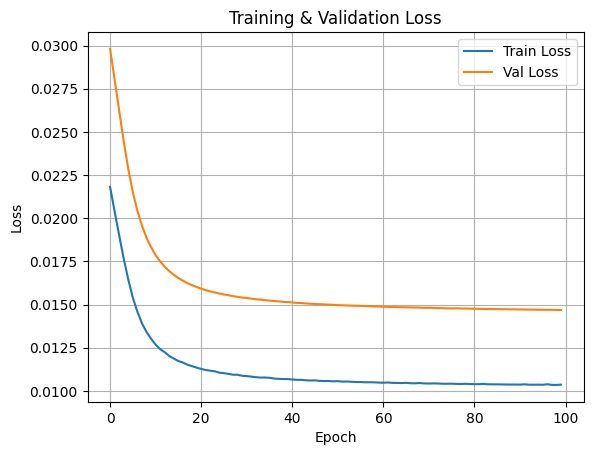

Testing Model...

🧪 Test Loss: 0.0121
✅ Test Accuracy: 95.61%


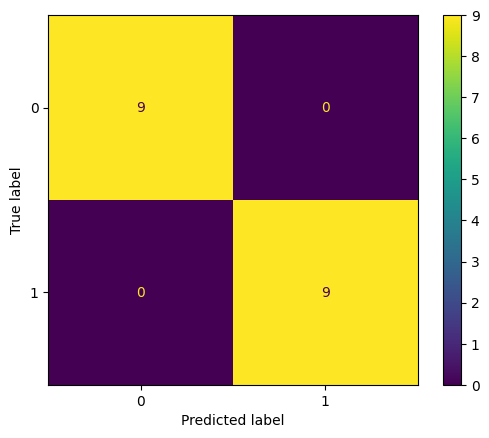

In [ ]:
# Creating the Neural Network (Model, Criterion and Optimizer)
my_model = Simple_Neural_Network(input_shape=30, n_neurons=20, output_shape=2).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_model.parameters(), lr=0.001)

# Train Model
print(f'Training Model...')
train_model(my_model, train_loader, val_loader, criterion, optimizer, epochs, patience=5)


In [ ]:
# Test Model
print(f'Testing Model...')
test_model(my_model, test_loader, criterion)